# 线性回归模型
从零开始实现整个线性回归

In [1]:
import random
import torch
from d2l import torch as d2l

Matplotlib is building the font cache; this may take a moment.


In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise.
        w: weight vector
        b: bias term
        num_examples: number of examples to generate
    """
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.1220, 0.1381]) 
label: tensor([3.9699])


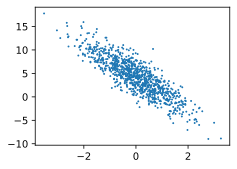

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [6]:
def data_iter(batch_size, features, labels):
    """
    batch_size: size of each mini-batch
    features: input features
    labels: corresponding labels
    """
    # The number of examples
    num_examples = len(features)
    # Create a list of indices and shuffle them
    indices = list(range(num_examples))
    random.shuffle(indices)  # Shuffle the dataset
    # Generate mini-batches
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        # Return the mini-batch of features and labels
        # like C++ iterators
        # every time we call data_iter, it yields a new mini-batch
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5288,  0.5658],
        [-1.4461, -1.2808],
        [ 0.2137, -0.7202],
        [-1.1964,  1.7606],
        [ 1.4743,  0.5541],
        [-0.3254, -0.8907],
        [ 0.2452, -0.5114],
        [-0.8817, -0.0643],
        [-0.8693,  0.5341],
        [ 0.2282,  0.4458]]) 
 tensor([[ 3.3464],
        [ 5.6708],
        [ 7.0855],
        [-4.1805],
        [ 5.2591],
        [ 6.5917],
        [ 6.4196],
        [ 2.6681],
        [ 0.6453],
        [ 3.1229]])


In [20]:
# Initialize model parameters
# 2 features, so w has shape (2, 1)
# gradient tracking is enabled
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
#  Initialize bias term
b = torch.zeros(1, requires_grad=True)

In [18]:
# Linear model
def linreg(X, w, b):
    """The linear regression model.
        X: input features
        w: weights
        b: bias term
    """
    return torch.matmul(X, w) + b

In [10]:
# Squared loss function
def squared_loss(y_hat, y):
    """Squared loss function.
        y_hat: predicted values
        y: true values
    """
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [11]:
# optimizer: stochastic gradient descent
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent.
        params: model parameters
        lr: learning rate
        batch_size: size of each mini-batch
    """
    with torch.no_grad():
        for param in params:
            # Update parameters using gradient
            # lr: learning rate
            # batch_size: to average the gradient
            param -= lr * param.grad / batch_size
            param.grad.zero_()  # Reset gradients to zero after updating

In [21]:
lr = 0.03  # Learning rate
num_epochs = 3  # Number of epochs
net = linreg  # Linear model
loss = squared_loss  # Squared loss function

for epoch in range(num_epochs):  # Loop over epochs
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Compute loss
        l.sum().backward()  # Backpropagate to compute gradients
        sgd([w, b], lr, batch_size)  # Update parameters using SGD
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.033290
epoch 2, loss 0.000116
epoch 3, loss 0.000049


In [13]:
print(f"w的估计误差: {true_w - w.reshape(true_w.shape)}")
print(f"b的估计误差: {true_b - b}")

w的估计误差: tensor([ 0.0002, -0.0008], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0002], grad_fn=<RsubBackward1>)
